In [5]:
import sys
import os
import cairosvg
from IPython.core.display import display, Markdown
from PIL import Image
from json_dict import JsonDict
from featurizer import FeaturizerList

sys.path.append(os.path.abspath(".."))
from featurizer.chem_featurizer import (
    default_atom_featurizer,
    atom_degree_one_hot,
    atom_symbol_hcnopsclbr_other_one_hot,
    atom_implicit_valence_one_hot,
    atom_formal_charge,
    atom_partial_charge,
    atom_hybridization_one_hot,
    atom_is_aromatic,
    atom_total_num_H_one_hot,
    atom_mass,
    atom_num_radical_electrons,
)


from rdkit import Chem
import numpy as np

[CH2]1[CH](O)[CH2][CH](O)[CH2][CH](O)[CH2][CH](O)[CH2][CH](O)[CH2][CH](O)[CH2][CH](O)[CH2][CH](O)[CH2][CH](O)[CH2][CH](O)1
[CH2][CH](O)


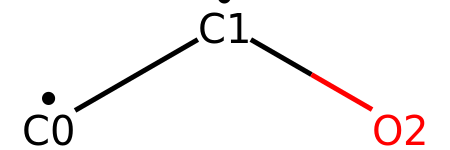

In [119]:
repeating_unit_smiles = "[CH2][C](C)(C(=O)OC)"
repeating_unit_smiles = "[CH2][CH](O)"
NRU = 10

s = (
    repeating_unit_smiles.replace("]", "]1", 1)
    + repeating_unit_smiles * (NRU - 1)
    + "1"
)
print(s)
circ_mol = Chem.MolFromSmiles(s)
Chem.Draw.MolToImage(circ_mol).save("gc_circ.png")

s = repeating_unit_smiles
print(s)
mol = Chem.MolFromSmiles(s)
for atom in mol.GetAtoms():
    atom.SetProp("atomLabel", atom.GetSymbol() + str(atom.GetIdx()))
Chem.Draw.MolToImage(mol).save("gc_one_number.png")

circ_mol = Chem.AddHs(circ_mol)
mol

In [157]:
featurizer = FeaturizerList(
    [
        atom_symbol_hcnopsclbr_other_one_hot,
        atom_degree_one_hot,
        atom_degree_one_hot,
        atom_implicit_valence_one_hot,
        atom_formal_charge,
        atom_partial_charge,
        atom_hybridization_one_hot,
        atom_is_aromatic,
        atom_total_num_H_one_hot,
        atom_mass,
        atom_num_radical_electrons,
    ]
)

for f in featurizer._feature_list:
    print(f, np.array(f(mol.GetAtomWithIdx(2))))
np.array(featurizer(mol.GetAtomWithIdx(2)))

atom_symbol_hcnopsclbr_other_one_hot [False False False  True False False False False False]
atom_degree_one_hot [False  True False False False False False False]
atom_degree_one_hot [False  True False False False False False False]
atom_implicit_valence_one_hot [False  True False False False False False False]
atom_formal_charge [0]
atom_partial_charge [-0.39043485]
atom_hybridization_one_hot [False False  True False False False False False]
atom_is_aromatic [False]
atom_total_num_H_one_hot [False  True False False False False False False False]
atom_mass [0.15999]
atom_num_radical_electrons [0]


array([ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.39043485,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.15999   ,  0.        ])

In [305]:
of = 2

np.set_printoptions(threshold=sys.maxsize)
feature_matrix = np.array([featurizer(a) for a in circ_mol.GetAtoms()])
print("feature_matrix")
(feature_matrix * 1000).astype(int).astype(float) / 1000

feature_matrix


array([[ 0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,
         0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.12 ,  0.   ],
       [ 0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,
         0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.058,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.12 ,  0.   ],
      

In [269]:
adj = Chem.GetAdjacencyMatrix(circ_mol)
adj_hat = (adj + np.eye(adj.shape[0])).astype(int)
print("adj_hat")
adj_hat

adj_hat


array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1,

In [270]:
deg_hat = np.eye(adj.shape[0]).astype(int) * [
    len(a.GetNeighbors()) + 1 for a in circ_mol.GetAtoms()
]
print("deg_hat")
deg_hat

deg_hat


array([[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0,

In [301]:
deg_inv = deg_hat ** (-0.5)
deg_inv = np.nan_to_num(deg_inv, posinf=0, neginf=0)
c = deg_inv @ adj_hat @ deg_inv
print("C")
(c * 100).astype(int).astype(float) / 100

C


/home/julian/anaconda3/envs/nanoparticle_size_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in power
  """Entry point for launching an IPython kernel.


array([[0.2 , 0.2 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.31, 0.31, 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ],
       [0.2 , 0.2 , 0.25, 0.2 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.31,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.33, 0.  , 0.  , 0.  , 0.

In [272]:
weight_m = (
    (10 * (np.random.random((len(featurizer), of)) - 0.5)).astype(int).astype(float)
)
print("weight_m")
weight_m

weight_m


array([[ 2.,  4.],
       [ 1.,  4.],
       [-2.,  3.],
       [ 4., -2.],
       [-3.,  0.],
       [ 2.,  3.],
       [ 2., -3.],
       [-4., -3.],
       [-1.,  2.],
       [ 1., -1.],
       [ 2., -1.],
       [ 1.,  0.],
       [ 2.,  3.],
       [-4., -2.],
       [ 1.,  3.],
       [-4.,  0.],
       [-4., -4.],
       [ 0., -2.],
       [ 3., -1.],
       [-4.,  0.],
       [-1., -2.],
       [ 0., -3.],
       [ 2.,  1.],
       [-2.,  0.],
       [ 4., -2.],
       [ 1.,  4.],
       [ 0.,  4.],
       [-4., -2.],
       [ 0., -2.],
       [-4., -3.],
       [ 2.,  0.],
       [ 3.,  0.],
       [-2., -4.],
       [ 0., -4.],
       [ 4., -2.],
       [-3., -1.],
       [ 1., -1.],
       [ 2.,  0.],
       [ 0., -4.],
       [ 4., -2.],
       [-4.,  0.],
       [-3.,  0.],
       [ 0.,  0.],
       [ 3.,  2.],
       [ 2.,  4.],
       [ 0.,  4.],
       [ 0.,  4.],
       [-1.,  3.],
       [ 2., -3.],
       [ 4.,  1.],
       [-4., -1.],
       [ 1.,  4.],
       [-4.,

In [273]:
bias = (5 * np.random.random((weight_m.shape[1]))).astype(int).astype(float)
print("bias")
bias

bias


array([0., 3.])

In [291]:
mat = (c @ feature_matrix @ weight_m * 100).astype(int).astype(float) / 100  # + bias
print("result")
mat

result


array([[ 7.85, 10.43],
       [ 5.86,  9.05],
       [ 6.65,  7.94],
       [ 7.85, 10.43],
       [ 5.86,  9.05],
       [ 6.65,  7.94],
       [ 7.85, 10.43],
       [ 5.86,  9.05],
       [ 6.65,  7.94],
       [ 7.85, 10.43],
       [ 5.86,  9.05],
       [ 6.65,  7.94],
       [ 7.85, 10.43],
       [ 5.86,  9.05],
       [ 6.65,  7.94],
       [ 7.85, 10.43],
       [ 5.86,  9.05],
       [ 6.65,  7.94],
       [ 7.85, 10.43],
       [ 5.86,  9.05],
       [ 6.65,  7.94],
       [ 7.85, 10.43],
       [ 5.86,  9.05],
       [ 6.65,  7.94],
       [ 7.85, 10.43],
       [ 5.86,  9.05],
       [ 6.65,  7.94],
       [ 7.85, 10.43],
       [ 5.86,  9.05],
       [ 6.65,  7.94],
       [ 5.78,  7.18],
       [ 5.78,  7.18],
       [ 5.91,  7.11],
       [ 7.36,  7.55],
       [ 5.78,  7.18],
       [ 5.78,  7.18],
       [ 5.91,  7.11],
       [ 7.36,  7.55],
       [ 5.78,  7.18],
       [ 5.78,  7.18],
       [ 5.91,  7.11],
       [ 7.36,  7.55],
       [ 5.78,  7.18],
       [ 5.

In [300]:
print("max1", mat[:, 0].max())
print("max2", mat[:, 1].max())
print("mean1", mat[:, 0].mean())
print("mean2", mat[:, 1].mean())

max1 7.85
max2 10.43
mean1 6.4557142857142855
mean2 8.062857142857139


In [ ]:
np.set_printoptions(threshold=1000)

9223372036854775807